# **A Study of Films Available on Netflix**
**Introduction / Problem Statement**

This report aims to draw findings in the films accessible on Netflix. In particular, we are addressing two issues:

1. What is the average screening time for movies? Are there any abnormal duration?
2. Is there a preference in a particular type of film over the years?

**Dataset**

This dataset consists of tv shows and movies available on Netflix as of 2020. The dataset is collected from Flixable which is a third-party Netflix search engine.

**Methodology**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading csv file obtained from flixable
df1 = pd.read_csv('netflix_titles.csv')

#sanity check on the csv file
print(df1.describe())
print("(rows, columns) =",df1.shape)
display(df1.head())

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
(rows, columns) = (6234, 12)


show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [3]:
#set condition to filter to obtain data from movies only
cond1 = df1['type'] == 'Movie'
#filter duration column 
df2 = df1[cond1][['duration']]
#remove the min label on the duration and convert to int for sorting purposes
df2['duration_int'] = df2['duration'].apply(lambda x: x.replace(" min",""))
df2['duration_int'] = df2['duration_int'].apply(lambda x: int(x))
#sort duration timing for easier visualisation
df2_sorted = df2.sort_values('duration_int')
#group movies together by their duration and count
duration_gb = df2_sorted.groupby('duration_int')
count = duration_gb.size()
#create new dataframe with the movie durations count
frame = {'count':count}
duration_df = pd.DataFrame(frame).reset_index()
display(duration_df.head())

duration_int  count
0             3      1
1            10      1
2            11      1
3            12      2
4            14      2

In [4]:
#display the statistical data of movie duration
display(duration_df['duration_int'].describe())

count    186.000000
mean     107.763441
std       57.572215
min        3.000000
25%       60.250000
50%      106.500000
75%      152.750000
max      312.000000
Name: duration_int, dtype: float64

We have obtained the statistical data for the duration of the movie, but we are unable to tell how the relation would appear between the number of movies per duration. Hence, we plot a graph.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Duration'),
 Text(0.5, 1.0, 'Distribution of movie duration')]

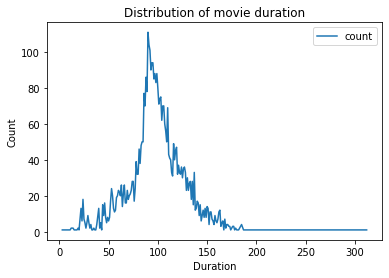

In [5]:
plot = duration_df.plot(kind='line',x='duration_int',y='count')
plot.set(title = 'Distribution of movie duration', xlabel = 'Duration', ylabel = 'Count')


We can see the it is shaped like a mountain chart, with majority of the movie duration placed at about 100 mins. According to a survey done by yougov, there is a general consensus among people that the ideal movie duration should be around 1.5h-2h. As seen from the data that we obtained via netflix, the movies have generally fulfilled the criteria of an ideal movie duration. 

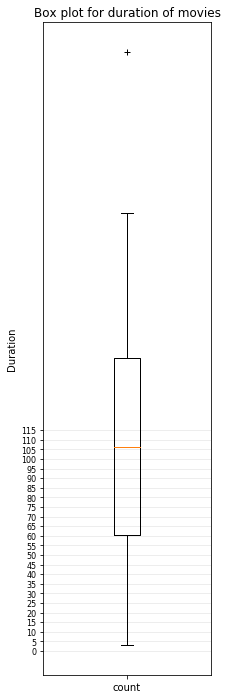

In [6]:
quartile_1 = duration_df['duration_int'].quantile(q=0.25)
quartile_3 = duration_df['duration_int'].quantile(q=0.75)
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR
outlier_cond = ~duration_df["duration_int"].between(lower_bound,upper_bound)
outliers_df = duration_df[outlier_cond]

# Visualise to confirm
fig = plt.figure(figsize=(3, 12))
# fig = plt.figure(figsize=(3, 100))
ax1 = plt.subplot(111)
# Plot the boxplot and add the relevant features of the plot
ax1.boxplot(duration_df['duration_int'], sym='+', whis=1.5)
ax1.set_ylabel('Duration')
ax1.set_title('Box plot for duration of movies')
plt.xticks([1], ['count'])
# Set the yticks of the dataset
ax1.set_yticks(np.arange(0, 120, 5))
ax1.set_yticklabels(labels=np.arange(0, 120, 5), fontsize=8)
# Use grid to show the gridlines in the plot
ax1.yaxis.grid(True, linestyle='-', color='lightgrey', alpha=0.5)
plt.show()

This shows that there is only one movie that does not lie within the interquartile range. This is the movie that has an astounding playtime of 312 mins. 

In [7]:
df3 = pd.read_csv('netflix_titles.csv')
df3['type'].unique() #check the variables in the type column

array(['Movie', 'TV Show'], dtype=object)

In this segment, we will address the second the issue, whether there is preference for a particular type of film over the years. We observed that there are 2 types of film, namely Movie and TV Show.

In [8]:
#check_string(x) is a function that extract only the year portion of the date_added 
def check_string(x):
    if(type(x) == str):
        x = x.split(",")[1]
        x = x.strip()
        return x

df3['date_added_year'] = df3['date_added'].apply(check_string) #date_added_year consists of year in YYYY or None
display(df3.head())

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description date_added_year  
0  Before planning an awesome wedding for his gra...            2019  
1  Jandino Asporaat riffs on the challenges of ra...            2016  
2  With the help of three human allies, the Autob...            2018  
3  When a prison ship crash unleashes hundreds of...            2018  
4  When nerdy high schooler Dani finally attracts...            2017

We used apply function to extract only the year portion from "date_added" column because we only interested in the changes in the popularity of the type of films over the years.

In [9]:
df3_groupby = df3.groupby(['type', 'date_added_year'])
flatten_df3 = df3_groupby.size().reset_index()
flatten_df3.columns = ['type', 'date_added_year', 'sum'] #filter the necessary columns for analysis
display(flatten_df3.head())

type date_added_year  sum
0  Movie            2008    1
1  Movie            2009    2
2  Movie            2010    1
3  Movie            2011   13
4  Movie            2012    4

In [10]:
#we pivot the columns based on Movies and TV Shows to obtain the sum based on the type of films
df3_pivot = pd.pivot_table(flatten_df3, index=['date_added_year'], columns=['type'], values='sum', aggfunc=np.sum)
df3_pivot.reset_index(inplace=True)
df3_pivot.columns = ['date_added_year', 'Movie', 'TV Show']
display(df3_pivot.head())

date_added_year  Movie  TV Show
0            2008    1.0      1.0
1            2009    2.0      NaN
2            2010    1.0      NaN
3            2011   13.0      NaN
4            2012    4.0      3.0

[Text(0, 0.5, 'No. of films'), Text(0.5, 0, 'Years')]

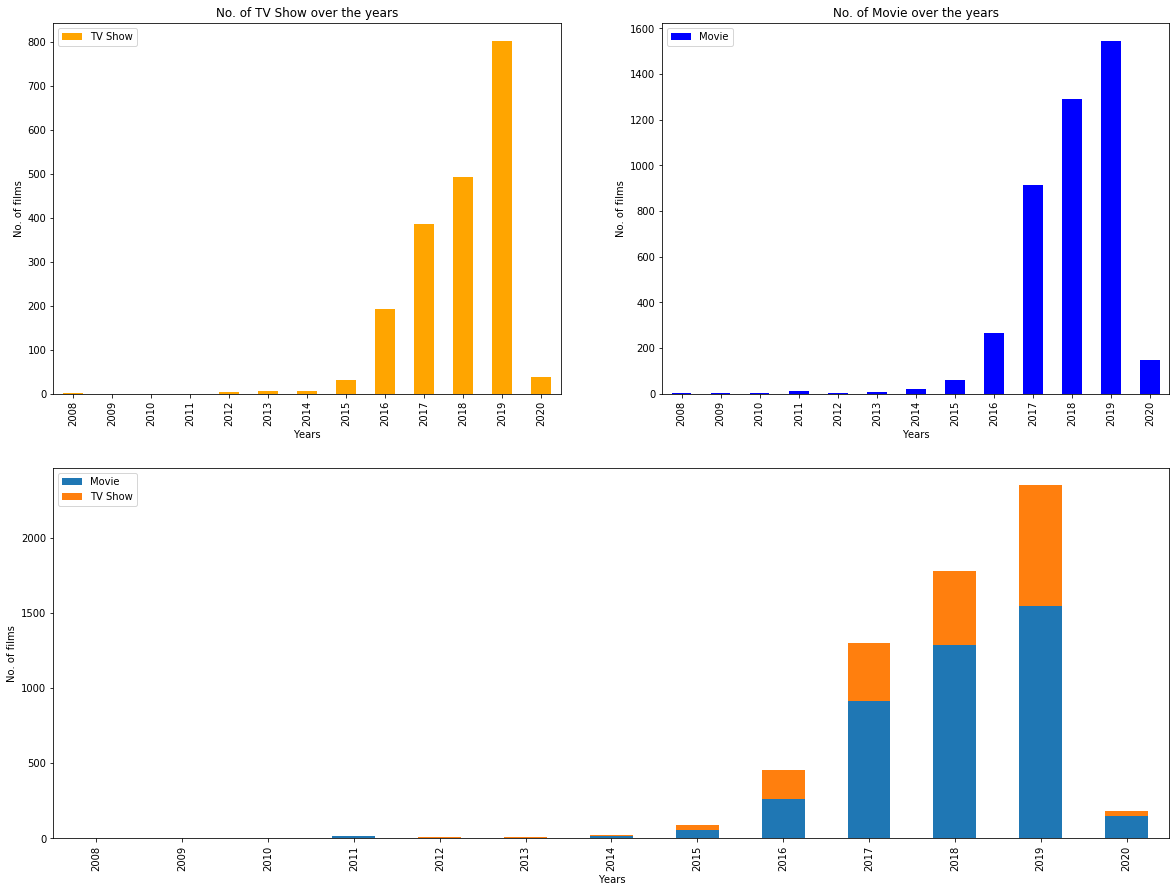

In [11]:
figure = plt.figure(figsize=(20,15))

#Plot for TV show
ax1 = figure.add_subplot(2,2,1)
df3_pivot.plot(kind='bar',color='orange',x='date_added_year',y='TV Show',ax=ax1).legend(loc=2, prop={'size': 10})
ax1.set(xlabel = 'Years',ylabel = 'No. of films', title = 'No. of TV Show over the years')

#Plot for Movie
ax2 = figure.add_subplot(2,2,2)
df3_pivot.plot(kind='bar',color='blue',x='date_added_year',y='Movie',ax=ax2).legend(loc=2, prop={'size': 10})
ax2.set(xlabel = 'Years',ylabel = 'No. of films', title = 'No. of Movie over the years')

#Plot for stacked
ax3 = figure.add_subplot(2,1,2)
df3_pivot.plot(kind='bar',stacked=True,x='date_added_year',ax=ax3).legend(loc=2, prop={'size': 10})
ax3.set(xlabel = 'Years',ylabel = 'No. of films')

As observed from the last graph, it can be seen that the number of films for both TV Show and Movie increases exponentially over the years. There is a fall in the number of films from 2019 to 2020. However, this could due to the number of films extracted for 2020 is not completed yet, where we have not reached the end of the year to get the complete amount of films for year 2020.

From the stacked graph, the number of films added for Movie is always greater than TV Show throughout the years. Perhaps, there is greater preference or popularity for Movies as compared to TV Shows in Netflix, where Netflix has been consistently adding more Movies than TV shows. As such, there is a preference for Movie as evident in the above plots.